# Writting polytropic models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
%matplotlib inline

### Constants values

In [3]:
Msun = 1.989e33 #sun mass [g]
Rsun = 6.96e10 #sun radius [cm]
n = 3 #polytropic index
Rho = 1.41 #sun mean density [g/cm^3]
X = 0.70 #hydrogen percentual
Y = 0.28 #helium percentual 
Z = 0.02 #metals percentual
Mi = 1.0/(2.0*X + 0.75*Y + 0.5*Z) #
R = 8.315e7 # [erg/K/g]
#T_EoS = 1.5e7 #
G = 6.67259e-8 #gravitational constant [cm3/g/s^2] 
step = 1e-3 #arbitrary step
kappa = 0.2*(1+X) #mean opacity [cm^2/g]
c = 3e10 #light velocity [cm/s]
sigma = 5.6704e-5 # radiation constant [erg/cm^2/s^1/K^4] 
mH = 1.6737236e-24 # mass of hydrogen [g]
kb = 1.3807e-16 #Boltzmann's constant [cm^2 g s-2 K-1]

### Initial conditionals

In [4]:
w0 = 1 #w(r=0) = 0
dwdz0 = 0 #dw/dz(r=0) = 0
z0 = 1e-4 #2/z --> infinite
M0 = 0 #mass in the center

#### Creating empty lists for each variable
Z = [z0,0]
W = [w0,0]
dW = [dwdz0,0]

## write the equation here

In [5]:
i=0
while W[i] >= 0:
    dW[i+1] = - step*((2/Z[i])*(dW[i]) + (W[i]**n)) + dW[i]
    W[i+1] = W[i] + step*dW[i]    
    Z[i+1] = Z[i] + step    
    dW.append(dW[i+1])
    W.append(W[i+1])
    Z.append(Z[i+1])
    i += 1

### Calculating the estimated radius of the Sun

Text(0,0.5,'$\\omega(z)$')

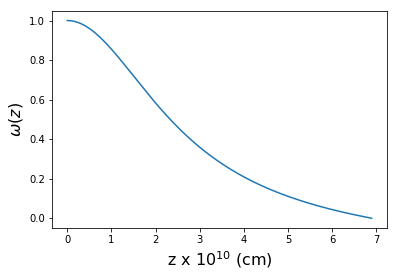

In [6]:
#Gráfico de w(z) versus z

plt.plot(Z,W)
plt.xlabel(r'z x $10^{10}$ (cm)',fontsize=16)
plt.ylabel(r'$\omega(z)$',fontsize=16)

In [7]:
z3 = Z[-1] * 10**10
z3

68951000000.00638

### Calculating the estimate central density of the Sun

In [8]:
dw_dz_imax = dW[-1]*10**10
print(dw_dz_imax)
rho_c = Rho / (-(3/(z3)*(dw_dz_imax)))
print(rho_c)

-424251906.6825196
76.38615051470848


### Calculating the estimate central pressure of the Sun

In [9]:
A = z3/Rsun
alpha = 1/A
print(A)

0.9906752873564135


In [10]:
K = 6.135e14

In [11]:
#Using the polytropic equation
gamma = 1 + 1/n
P_c = K*((rho_c)**(gamma))
print('Pressão central do Sol = '+str(P_c)+' g/cm/s2')

Pressão central do Sol = 1.9883861653210586e+17 g/cm/s2


### Calculating the estimate central temperature of the Sun

In [12]:
#Using the ideal gas equation
Tc = Mi*P_c/(R*rho_c)
print('Temperatura central do Sol= '+str(Tc)+' K')

Temperatura central do Sol= 19324525.565074705 K


##### Plots

In [13]:
r = [z/A for z in Z]
rho_r = [rho_c*(w**n) for w in W]
P_r = [P_c*(w**n+1) for w in W]
T_r = [(P_c/rho_c)*(Mi/R)*w for w in W]

In [14]:
for i in range(0,len(r)):
    r[i] = r[i]*10**10

Text(0,0.5,'T [K]')

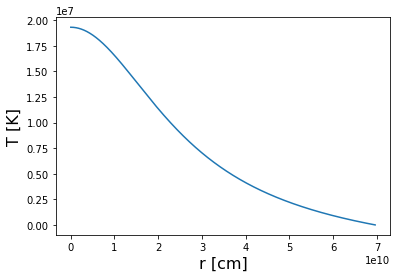

In [16]:
plt.plot(r[1:],T_r[1:])
plt.xlabel('r [cm]',fontsize=16)
plt.ylabel('T [K]',fontsize=16)

Text(0,0.5,'P [?]')

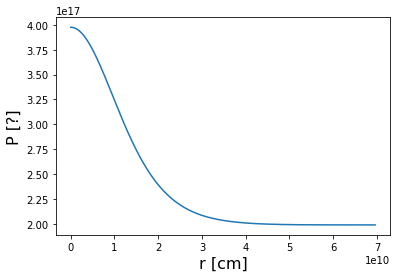

In [17]:
plt.plot(r[1:],P_r[1:])
plt.xlabel('r [cm]',fontsize=16)
plt.ylabel('P [?]',fontsize=16)

## Mass(r)

In [22]:
M_r = [0,0]

for i in range(0,len(rho_r)-1):
    M_r[i+1] = (step/A)*4*math.pi*rho_r[i]*(r[i]**2) + M_r[i]
    M_r.append(M_r[i+1])

Text(0,0.5,'M [g]')

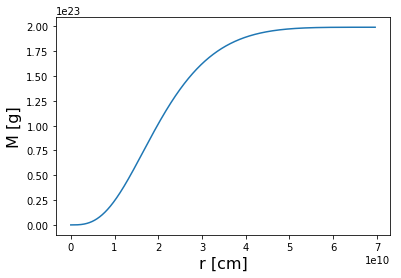

In [26]:
plt.plot(r[:],M_r[:-1])
plt.xlabel('r [cm]',fontsize=16)
plt.ylabel('M [g]',fontsize=16)

### Luminosity

In [ ]:
L_r = [0,0]

for i in range(0,len(rho_r)-1):
    L_r[i+1] = (step/A)*4*math.pi*rho_r[i]*(r[i]**2)*eff + L_r[i]
    L_r.append(M_r[i+1])

## dT/dr for radiation

In [ ]:
dT = [0,0]

for i in range(0,len(rho_r)-1):
    L_r[i+1] = (step/A)*4*math.pi*rho_r[i]*(r[i]**2)*eff + L_r[i]
    L_r.append(M_r[i+1])